In [1]:
#In the Sales Transaction data the categorical value column is Payment,Source,Product
#There is no interval or ordinal data & ratio data in the dataframe

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_excel('Sales Transactions.xlsx')
df.head()

,Cust ID,Region,Payment,Transaction Code,Source,Amount,Product,Time Of Day
0,10001,East,Paypal,93816545,Web,20.19,DVD,22:19:00
1,10002,West,Credit,74083490,Web,17.85,DVD,13:27:00
2,10003,North,Credit,64942368,Web,23.98,DVD,14:27:00
3,10004,West,Paypal,70560957,Email,23.51,Book,15:38:00
4,10005,South,Credit,35208817,Web,15.33,Book,15:21:00


In [4]:
df[df["Cust ID"] == 10007][["Transaction Code"]]

,Transaction Code
6,80103311


In [6]:
df.isin(['Transaction Code'== 10001]).any().any()

False

In [7]:
df[df['Cust ID']==10001][['Transaction Code']]

,Transaction Code
0,93816545


In [8]:
df1 = pd.read_excel('Purchase Orders.xlsx')

In [9]:
df1.head()

,Supplier,Order No.,Item No.,Item Description,Item Cost,Quantity,Cost per order,A/P Terms (Months),Order Date,Arrival Date
0,Hulkey Fasteners,Aug11001,1122,Airframe fasteners,4.25,19500,82875.0,30,2011-08-05,2011-08-13
1,Alum Sheeting,Aug11002,1243,Airframe fasteners,4.25,10000,42500.0,30,2011-08-08,2011-08-14
2,Fast-Tie Aerospace,Aug11003,5462,Shielded Cable/ft.,1.05,23000,24150.0,30,2011-08-10,2011-08-15
3,Fast-Tie Aerospace,Aug11004,5462,Shielded Cable/ft.,1.05,21500,22575.0,30,2011-08-15,2011-08-22
4,Steelpin Inc.,Aug11005,5319,Shielded Cable/ft.,1.10,17500,19250.0,30,2011-08-20,2011-08-31


In [10]:
#laregst quantity value
df1.nlargest(1, ['Quantity']) 

,Supplier,Order No.,Item No.,Item Description,Item Cost,Quantity,Cost per order,A/P Terms (Months),Order Date,Arrival Date
25,Hulkey Fasteners,Sep11012,5066,Shielded Cable/ft.,0.95,25000,23750.0,30,2011-09-05,2011-09-12


In [11]:
#smallest value quantity
df1.nsmallest(1,['Quantity'])

,Supplier,Order No.,Item No.,Item Description,Item Cost,Quantity,Cost per order,A/P Terms (Months),Order Date,Arrival Date
65,Manley Valve,Oct11018,7258,Pressure Gauge,100.5,90,9045.0,30,2011-10-10,2011-10-17


In [12]:
#total of order cost 
df1['Item Cost'].sum()

5888.250000000001

In [13]:
df1['Order No.'].count()

94

In [14]:
df1.rename(columns={'Item Description':'Itemdesc'}, inplace=True)

In [15]:
#details for O-Ring purchased
[df1[df1.Itemdesc == 'O-Ring'].count()]

[Supplier              12
 Order No.             12
 Item No.              12
 Itemdesc              12
 Item Cost             12
 Quantity              12
 Cost per order        12
 A/P Terms (Months)    12
 Order Date            12
 Arrival Date          12
 dtype: int64]

In [16]:
df1.rename(columns={'A/P Terms (Months)':'AP'}, inplace=True)

In [17]:
#Number of orders with A/P term shorter than 30 months
df1[df1['AP'] < 30]['Order No.'].count()

17

In [18]:
a = df1['AP'].mean()
a

30.638297872340427

In [19]:
b = df1['Itemdesc'].value_counts()
b

Airframe fasteners      14
O-Ring                  12
Bolt-nut package        11
Shielded Cable/ft.      11
Gasket                  10
Side Panel               8
Electrical Connector     8
Pressure Gauge           7
Control Panel            4
Machined Valve           4
Hatch Decal              2
Door Decal               2
Panel Decal              1
Name: Itemdesc, dtype: int64

In [20]:
#average months for each item
c = a/b
c

Airframe fasteners       2.188450
O-Ring                   2.553191
Bolt-nut package         2.785300
Shielded Cable/ft.       2.785300
Gasket                   3.063830
Side Panel               3.829787
Electrical Connector     3.829787
Pressure Gauge           4.376900
Control Panel            7.659574
Machined Valve           7.659574
Hatch Decal             15.319149
Door Decal              15.319149
Panel Decal             30.638298
Name: Itemdesc, dtype: float64

In [21]:
import matplotlib.pyplot as plt

In [22]:
df2 = pd.read_excel('S&P 500.xlsx')

In [23]:
df2.head()

,Date,Open,High,Low,Close
0,2007-10-03,1539.7400,1545.8401,1536.3398,1539.5898
1,2007-10-04,1542.6299,1544.0200,1537.6299,1542.8398
2,2007-10-05,1550.5100,1561.9099,1543.8398,1557.5898
3,2007-10-08,1553.6899,1556.5100,1549.0000,1552.5798
4,2007-10-09,1556.2900,1565.2700,1551.8098,1565.1499


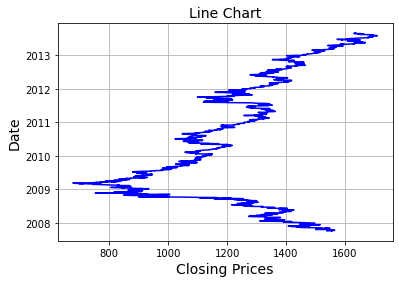

In [24]:
plt.plot(df2['Close'], df2['Date'], color='Blue')
plt.title('Line Chart', fontsize=14)
plt.xlabel('Closing Prices', fontsize=14)
plt.ylabel('Date', fontsize=14)
plt.grid(True)
plt.show()

df2 = pd.read_excel('S&P 500.xlsx')

In [25]:
df3 = pd.read_excel('Science and Engineering Jobs.xlsx')
df3.head()

,Occupation,2000,2010
0,Scientists,3241,5301
1,Life scientists,184,218
2,Mathematical/computer scientists,2408,4308
3,Computer specialists,2318,4213
4,Mathematical scientists,89,95


In [26]:
new_df = df3.drop(8)

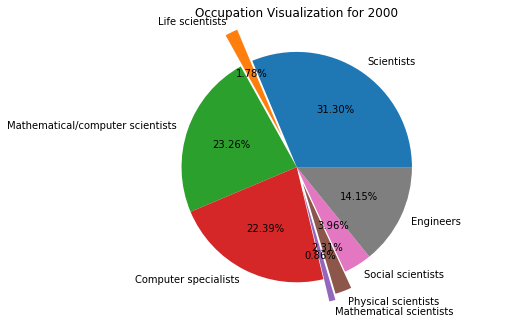

In [27]:
#for year 2000
fig = plt.figure()
explode = (0,0.3,0,0,0.2,0.15,0,0)
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
occ = new_df[new_df.columns[0]].tolist()
counts = new_df[new_df.columns[1]].tolist()
ax.pie(counts, labels = occ,autopct='%1.2f%%',explode=explode)
ax.set_title('Occupation Visualization for 2000')
plt.show()

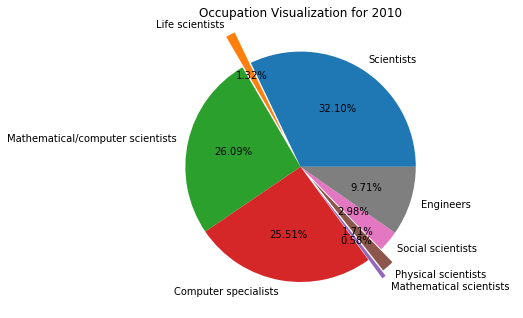

In [28]:
#for year 2010
fig = plt.figure()
explode = (0,0.3,0,0,0.2,0.15,0,0)
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
occ = new_df[new_df.columns[0]].tolist()
counts = new_df[new_df.columns[2]].tolist()
ax.pie(counts, labels = occ,autopct='%1.2f%%',explode=explode)
ax.set_title('Occupation Visualization for 2010')
plt.show()

In [33]:
df4 = pd.read_excel('Facebook Survey.xlsx',skiprows=2)
df4.head()

,Student,Gender,Hours online/week,Friends
0,1,female,4,150
1,2,female,10,400
2,3,male,7,120
3,4,male,15,500
4,5,female,9,260


In [34]:
df4.columns

Index(['Student', 'Gender', 'Hours online/week', 'Friends'], dtype='object')

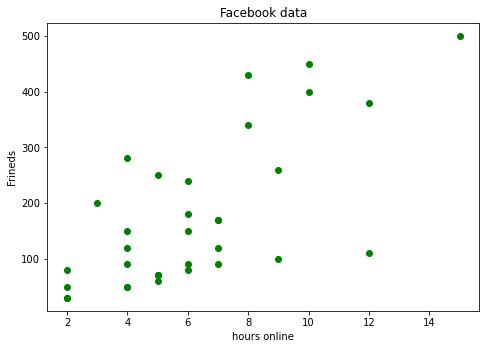

In [35]:
hours = df4["Hours online/week"].tolist()
frnds = df4["Friends"].tolist()
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(hours, frnds, color='green')
ax.set_xlabel('hours online')
ax.set_ylabel('Frineds')
ax.set_title('Facebook data')
plt.show()

In [36]:
df5 = pd.read_excel('Atlanta Airline Data.xlsx')
df5.head()

,Flight Number,Origin Airport,Scheduled Arrival Time,Actual Arrival Time,Time Difference (Minutes),Taxi-in Time (Minutes)
0,8,IAH,19:04,19:19,15,14
1,16,LAX,15:10,15:04,-6,6
2,22,MSY,16:33,16:24,-9,11
3,24,LAS,14:33,14:27,-6,9
4,28,MCO,14:10,14:15,5,13


In [37]:
from scipy import stats

In [38]:
df5.rename(columns={'Time Difference (Minutes)':'TD'}, inplace=True)
df5.head()

,Flight Number,Origin Airport,Scheduled Arrival Time,Actual Arrival Time,TD,Taxi-in Time (Minutes)
0,8,IAH,19:04,19:19,15,14
1,16,LAX,15:10,15:04,-6,6
2,22,MSY,16:33,16:24,-9,11
3,24,LAS,14:33,14:27,-6,9
4,28,MCO,14:10,14:15,5,13


In [39]:
#drop the last beacuse was giving parse error
df5_c = df5.drop(330)

In [40]:
df5_c['TD'] = pd.to_numeric(df5_c['TD'])

In [41]:
#percentile 10th and 90th
print("Percentile", stats.percentileofscore(df5_c['TD'],10))
print("Percentile", stats.percentileofscore(df5_c['TD'],90))

Percentile 77.27272727272727
Percentile 98.18181818181819


In [42]:
print(np.percentile(df5_c['TD'], np.arange(25,75)))

[-12.   -12.   -11.   -11.   -11.   -10.   -10.   -10.    -9.    -9.
  -9.    -9.    -8.    -8.    -8.    -7.4   -7.    -6.    -6.    -6.
  -5.    -4.66  -4.    -4.    -3.    -3.    -2.    -2.    -2.    -2.
  -1.    -1.    -1.    -1.     0.     0.4    1.     1.     2.     2.
   2.85   3.     3.     4.     5.01   6.3    7.     7.     8.     8.  ]


In [43]:
#quartile q1 and q3
print(np.percentile(df5_c.TD, 25))
print(np.percentile(df5_c.TD, 75))

-12.0
8.0


In [44]:
df6 = pd.read_excel('Cell Phone Survey.xlsx')
df6.head()

,Gender,Carrier,Type,Usage,Signal strength,Value for the Dollar,Customer Service
0,M,AT&T,Smart,High,5,4,4
1,M,AT&T,Smart,High,5,4,2
2,M,AT&T,Smart,Average,4,4,4
3,M,AT&T,Smart,Very high,2,3,3
4,M,AT&T,Smart,Very high,5,5,2


In [45]:
freq_dist=df6["Carrier"].value_counts().sort_index() 
print(freq_dist)

AT&T        26
Other        9
Sprint       5
T-mobile     2
Verizon     10
Name: Carrier, dtype: int64


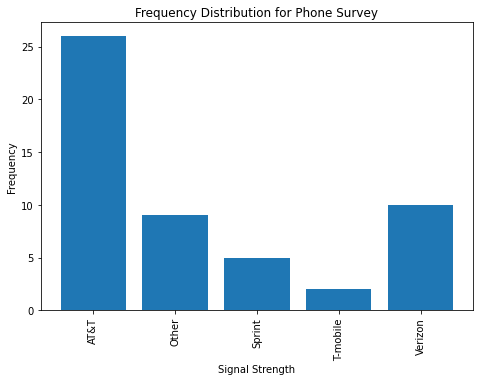

In [46]:
fig = plt.figure() 
ax = fig.add_axes([0,0,1,1])
ax.bar(freq_dist.index.tolist(),freq_dist.tolist()) 
plt.xticks(rotation=90) 
plt.ylabel('Frequency') 
plt.xlabel('Signal Strength') 
plt.title('Frequency Distribution for Phone Survey')
plt.show()

Text(0.5, 1.0, 'Histogram for Phone Survey')

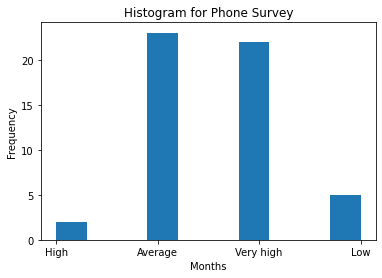

In [47]:
plt.hist(df6["Usage"])
plt.ylabel('Frequency')
plt.xlabel('Months')
plt.title('Histogram for Phone Survey')

In [48]:
z = df6["Carrier"].value_counts().sort_index()
print(z)

AT&T        26
Other        9
Sprint       5
T-mobile     2
Verizon     10
Name: Carrier, dtype: int64


In [49]:
count=len(df6)
count

52

In [50]:
#relative frequnecy
print(z/count)

AT&T        0.500000
Other       0.173077
Sprint      0.096154
T-mobile    0.038462
Verizon     0.192308
Name: Carrier, dtype: float64


In [51]:
#cumalative relative frequency
z.cumsum()

AT&T        26
Other       35
Sprint      40
T-mobile    42
Verizon     52
Name: Carrier, dtype: int64

(array([26., 26., 35., 35., 35., 40., 40., 50., 50., 52.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

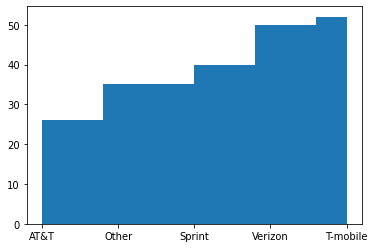

In [52]:
#graph for cumalative relative data
plt.hist(df6['Carrier'],bins=10, cumulative=True)